## Neural Networks

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [2]:
def splitDate(df):
    X_date = []
    for d in df.index:
        d = str(d).split(' ')[0]
        x = []
        x.append(int(d.split('-')[0]))
        x.append(int(d.split('-')[1]))
        x.append(int(d.split('-')[2]))
        X_date.append(x)
    
    X_date = np.array(X_date,dtype=np.int64) 
    return [X_date[:,:1],X_date[:,1:2],X_date[:,2:3]]

In [3]:
def calculateError(predicted,actual):
    n = len(predicted)
    s = 0
    for i in range(n):
        s += ((predicted[i]-actual[i])/actual[i]*100)
    return s/float(n);

In [4]:
#Function to read data from csv file and create a dataframe
def getDataSplitInTrainTest(fname,ftrends):
    #Read into dataframe
    df = pd.read_csv(fname,index_col='Date',
                     parse_dates=True,na_values=['nan'])
    
       
    
    df['Date'] = pd.to_datetime(df.index).astype(np.int64)
    df['Year'],df['Month'],df['Day'] = splitDate(df)
    
    df_trends = pd.read_csv(ftrends,index_col='Date',parse_dates=True)
        
    #Stat and End Date for train and test data respectivly
    #Train Data
    train_start_date = '2007-01-01'
    train_end_date = '2016-12-30'
    train_dates = pd.date_range(train_start_date,train_end_date)
    
    #Test Data
    test_start_date = '2016-12-15'    
    test_end_date = '2016-12-30'
    test_dates = pd.date_range(test_start_date,test_end_date)
    
    #Our dataframe wil have date as index and one column as open price
    df_train = pd.DataFrame(index=train_dates) 
    df_test = pd.DataFrame(index=test_dates) 

    #Join
    df_train = df_train.join(df)
    df_test = df_test.join(df)
    
    #drop nan
    df_train = df_train.dropna()
    df_test = df_test.dropna()
    
    #For trends value
    df_train1 = df_train.join(df_trends).dropna()
    df_test1 = df_test.join(df_trends).dropna()
    
    #Return df_train and df_train as a tuple
    return (df_train1,df_test1)
    
#Calling function to get processed data
df_train,df_test = getDataSplitInTrainTest('AAPL.csv','TRENDS.csv')

In [5]:
#Train
#X_train = np.asarray([pd.to_datetime(df_train.index).astype(np.int64),df_train['Trend']])
X_train = df_train[['Year','Month','Day']]
y_train = df_train[['Open']]

#test
#X_test = np.array([pd.to_datetime(df_test.index).astype(np.int64),df_test['Trend']])
X_test = df_test[['Year','Month','Day']]
y_test = df_test[['Open']]


from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)
#y_train = y_train.reshape(y_train.shape[0],)
#y_test = y_test.reshape(y_test.shape[0],)

In [6]:
def plotDataframe(df,title):
    ax = df.plot(title=title,fontsize=10,ylim=(110,130))
    ax.set_xlabel("Data")
    ax.set_ylabel("Price")
    plt.show()   

## Algorithm

In [7]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
model1 = Sequential()
model1.add(Dense(100,activation='relu',input_dim=X_train.shape[1]))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')
model1.fit(X_train,
           y_train,
           epochs=500,
           batch_size=25)

Epoch 1/500
2491/2491 [==============================] - 1s 501us/step - loss: 0.2364
Epoch 2/500
2491/2491 [==============================] - 0s 121us/step - loss: 0.0954
Epoch 3/500
2491/2491 [==============================] - 0s 118us/step - loss: 0.0800
Epoch 4/500
2491/2491 [==============================] - 0s 126us/step - loss: 0.0681
Epoch 5/500
2491/2491 [==============================] - 0s 125us/step - loss: 0.0542
Epoch 6/500
2491/2491 [==============================] - 0s 97us/step - loss: 0.0408
Epoch 7/500
2491/2491 [==============================] - 0s 100us/step - loss: 0.0242
Epoch 8/500
2491/2491 [==============================] - 0s 96us/step - loss: 0.0230
Epoch 9/500
2491/2491 [==============================] - 0s 98us/step - loss: 0.0123
Epoch 10/500
2491/2491 [==============================] - 0s 126us/step - loss: 0.0127
Epoch 11/500
2491/2491 [==============================] - 0s 112us/step - loss: 0.0119
Epoch 12/500
2491/2491 [==============================]

2491/2491 [==============================] - 0s 113us/step - loss: 0.0060
Epoch 96/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0045
Epoch 97/500
2491/2491 [==============================] - 0s 111us/step - loss: 0.0029
Epoch 98/500
2491/2491 [==============================] - 0s 133us/step - loss: 0.0022
Epoch 99/500
2491/2491 [==============================] - 0s 142us/step - loss: 0.0022
Epoch 100/500
2491/2491 [==============================] - 0s 116us/step - loss: 0.0036
Epoch 101/500
2491/2491 [==============================] - 0s 110us/step - loss: 0.0025
Epoch 102/500
2491/2491 [==============================] - 0s 110us/step - loss: 0.0026
Epoch 103/500
2491/2491 [==============================] - 0s 114us/step - loss: 0.0028
Epoch 104/500
2491/2491 [==============================] - 0s 137us/step - loss: 0.0021
Epoch 105/500
2491/2491 [==============================] - 0s 109us/step - loss: 0.0024
Epoch 106/500
2491/2491 [=========================

2491/2491 [==============================] - 0s 117us/step - loss: 0.0017
Epoch 189/500
2491/2491 [==============================] - 0s 116us/step - loss: 0.0016
Epoch 190/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0017
Epoch 191/500
2491/2491 [==============================] - 0s 113us/step - loss: 0.0018
Epoch 192/500
2491/2491 [==============================] - 0s 112us/step - loss: 0.0018
Epoch 193/500
2491/2491 [==============================] - 0s 113us/step - loss: 0.0064
Epoch 194/500
2491/2491 [==============================] - 0s 104us/step - loss: 0.0022
Epoch 195/500
2491/2491 [==============================] - 0s 109us/step - loss: 0.0017
Epoch 196/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0016
Epoch 197/500
2491/2491 [==============================] - 0s 104us/step - loss: 0.0016
Epoch 198/500
2491/2491 [==============================] - 0s 112us/step - loss: 0.0015
Epoch 199/500
2491/2491 [=====================

2491/2491 [==============================] - 0s 116us/step - loss: 0.0025
Epoch 282/500
2491/2491 [==============================] - 0s 110us/step - loss: 0.0015
Epoch 283/500
2491/2491 [==============================] - 0s 155us/step - loss: 0.0014
Epoch 284/500
2491/2491 [==============================] - 0s 161us/step - loss: 0.0014
Epoch 285/500
2491/2491 [==============================] - 0s 115us/step - loss: 0.0014
Epoch 286/500
2491/2491 [==============================] - 0s 164us/step - loss: 0.0018
Epoch 287/500
2491/2491 [==============================] - 0s 112us/step - loss: 0.0011
Epoch 288/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0013
Epoch 289/500
2491/2491 [==============================] - 0s 111us/step - loss: 0.0013
Epoch 290/500
2491/2491 [==============================] - 0s 106us/step - loss: 0.0013
Epoch 291/500
2491/2491 [==============================] - 0s 116us/step - loss: 0.0012
Epoch 292/500
2491/2491 [=====================

2491/2491 [==============================] - 0s 118us/step - loss: 0.0012
Epoch 375/500
2491/2491 [==============================] - 0s 106us/step - loss: 0.0011
Epoch 376/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 377/500
2491/2491 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 378/500
2491/2491 [==============================] - 0s 111us/step - loss: 0.0012
Epoch 379/500
2491/2491 [==============================] - 0s 103us/step - loss: 0.0012
Epoch 380/500
2491/2491 [==============================] - 0s 108us/step - loss: 0.0011
Epoch 381/500
2491/2491 [==============================] - 0s 112us/step - loss: 0.0012
Epoch 382/500
2491/2491 [==============================] - 0s 112us/step - loss: 0.0011
Epoch 383/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0011
Epoch 384/500
2491/2491 [==============================] - 0s 115us/step - loss: 0.0011
Epoch 385/500
2491/2491 [=====================

2491/2491 [==============================] - 0s 111us/step - loss: 0.0010
Epoch 467/500
2491/2491 [==============================] - 0s 105us/step - loss: 9.9168e-04
Epoch 468/500
2491/2491 [==============================] - 0s 106us/step - loss: 0.0049
Epoch 469/500
2491/2491 [==============================] - 0s 109us/step - loss: 0.0065
Epoch 470/500
2491/2491 [==============================] - 0s 109us/step - loss: 0.0036
Epoch 471/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0015
Epoch 472/500
2491/2491 [==============================] - 0s 111us/step - loss: 0.0014
Epoch 473/500
2491/2491 [==============================] - 0s 107us/step - loss: 0.0011
Epoch 474/500
2491/2491 [==============================] - 0s 106us/step - loss: 0.0010
Epoch 475/500
2491/2491 [==============================] - 0s 108us/step - loss: 9.6749e-04
Epoch 476/500
2491/2491 [==============================] - 0s 103us/step - loss: 9.7499e-04
Epoch 477/500
2491/2491 [=========

0.16608574486378377


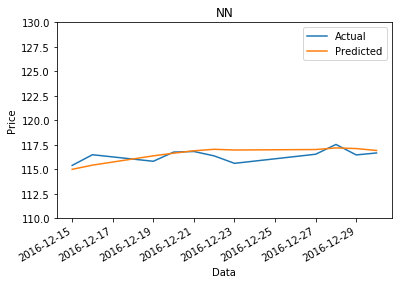

In [11]:
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_scaler.inverse_transform(y_test)
df_rf['Predicted'] =y_scaler.inverse_transform(model1.predict(X_test))
print(calculateError(df_rf['Predicted'],df_rf['Actual']))
plotDataframe(df_rf,"NN")

In [1]:
#model1.evaluate(X_test,y_test,batch_size=1)